<a href="https://colab.research.google.com/github/dannnn30/data-mining-_-daniel/blob/main/Supermarket_December_2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###0706022210060 - Daniel

### Strategy to Boost Supermarket Sales in January

As the manager of a supermarket in Surabaya, I find myself at a crossroads as we step into January. The new year has just begun, and I am eager to understand how my supermarket has been performing. My office is filled with stacks of transaction data from our customers, brimming with numbers, percentages, and seemingly endless combinations of products. Yet, I feel lost amidst the overwhelming data.

The challenge is clear: I need **insights on what is truly happening in my supermarket**. What are the purchasing patterns of my customers? Which products are flying off the shelves, and which ones are barely noticed? More importantly, **how can I use this information to optimize the layout of the store and boost sales this year**?

In January, **the store layout is the first thing I want to focus on**. Customers are navigating through the aisles, but I want to ensure they’re being guided to the right places. I wonder: Should I place complementary products closer together? Should I create specific zones to attract customers? For instance, should shampoos be next to toothpaste or near body soaps? Should snacks and drinks be closer together to encourage impulse buys?

The only thing I have right now is the [raw transaction data](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/Supermarket-December-2017.xlsx). It tells me what customers bought, but I need help deciphering it. **Are there certain product combinations that people frequently buy together?** For example, do people who buy detergents also pick up fabric softeners? Do snacks and beverages have a strong pairing trend?

I need your expertise to dig into this data and uncover patterns. Once we understand what products customers often buy together, I can rearrange the store layout to make it more intuitive and appealing. This way, I can improve the shopping experience for my customers while also increasing the chances of cross-selling and boosting sales.

Let’s uncover the story behind the numbers and make data-driven decisions that will set my supermarket up for success in this new year. Help me turn this chaotic dataset into a clear strategy that drives results!

### Grading

1. Understanding the Data (50 points)


*   Key Metrics (0/10/15/25 points): Identifies useful insights, eg: top-selling products, etc.
*   Seasonal Insights (0/10/15/25 points): Explains trends for January, highlighting any seasonal demands or anomalies in customer behavior.
<br>
<br>

2. Recommending Layout Improvements (50 points)

*   Market Basket Analysis Insights (0/10/15/25 points): Uses association rules to determine logical groupings of products.
*   Placement Ideas (0/10/15/25 points): Provides actionable layout changes idea to increase cross-selling opportunities, such as adjusting the location of high-demand complementary items, eg:
If "Shampoo" is frequently bought with "Soap," they should be placed near each other.




In [27]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
!pip install mlxtend==0.23.1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
url = "https://raw.githubusercontent.com/dannnn30/data-mining-_-daniel/main/Supermarket-December-2017.xlsx"
df = pd.read_excel(url, engine='openpyxl')

df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,KD_SBR,TP_TRN,KDSUP,KAS,TRN_DK,GDG,GGD,KDSLS,KEL,ITEM,...,DEP_SWA,GON,KONS,POST_STOK,STATUS,TP_ADJ,USER,TANGGAL,JAM,LAMA_CRD
0,IN,JUL,NaN,6.0,K,A,AREA,NaN,KERTAS,39390.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:12:02,NaN
1,IN,JUL,NaN,6.0,K,A,AREA,NaN,BTL/DOT,13108.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:24:51,NaN
2,IN,JUL,NaN,6.0,K,A,AREA,NaN,MUSTIKA,5644.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:18,NaN
3,IN,JUL,NaN,6.0,K,A,AREA,NaN,SABUN.C,7273.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:22,NaN
4,IN,JUL,NaN,6.0,K,A,AREA,NaN,LULURMD,12168.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:20,NaN


In [30]:
columns_not_needed = [ 'KDSUP', 'TRN_DK', 'GDG', 'GGD', 'KDSLS', 'BIN', 'KDBIN', 'NO_ORD',
    'SLD_AK', 'SLD_AKG', 'HRG_OLD', 'HRGBL_OLD','JLH_DIS', 'JLH_DIS1', 'JLH_DIS2', 'HRGJL_OLD', 'HRGJL1_OLD',
    'HRGJL2_OLD', 'SUPP_OLD', 'DISB1_OLD', 'DISB2_OLD', 'PPN_OLD',
    'PPNBM', 'PPNBM_OLD', 'PTS_GDG', 'PTS_KEL', 'PTS_ITEM', 'QTY_PTS',
    'TRNBL', 'POST', 'TGL_OLD', 'FILLER', 'SUPPLIER', 'DEP_SWA', 'GON',
    'KONS', 'POST_STOK', 'STATUS', 'TP_ADJ', 'USER', 'LAMA_CRD', 'KD_SBR','TP_TRN','KAS','ITEM']

df.drop(columns_not_needed, axis=1, inplace=True)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,KEL,NAMA,TGL_TRANS,NO_BKT,STS_BYR,QTY,HRG_PKK,HRG_JUL,DISC,DISC1,DISC2,PPN,JLH_TRANS,KET_TRANS,TANGGAL,JAM
0,KERTAS,KERTAS KADO SINAR DU,2017-01-02,060102001,CD,2.0,549.98,1100.0,0.0,0.0,NaN,0.0,2200.0,CASH DISCOUNT,2017-01-02,08:12:02
1,BTL/DOT,PIGEON BTL PP RP 240,2017-01-02,060102002,CD,1.0,20640.45,23000.0,0.0,0.0,NaN,0.0,23000.0,CASH DISCOUNT,2017-01-02,08:24:51
2,MUSTIKA,MR SEKAR TANJUNG KB,2017-01-02,060102003,CD,1.0,8720.00,9500.0,0.0,0.0,NaN,0.0,9500.0,CASH DISCOUNT,2017-01-02,08:28:18
3,SABUN.C,BIORE BF 100ML WHITE,2017-01-02,060102003,CD,1.0,6215.00,6900.0,0.0,0.0,NaN,0.0,6900.0,CASH DISCOUNT,2017-01-02,08:28:22
4,LULURMD,OVALE LULUR BALI BEN,2017-01-02,060102003,CD,1.0,12119.65,13500.0,0.0,0.0,NaN,0.0,13500.0,CASH DISCOUNT,2017-01-02,08:28:20


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148489 entries, 0 to 148488
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   KEL        148486 non-null  object        
 1   NAMA       148486 non-null  object        
 2   TGL_TRANS  148486 non-null  datetime64[ns]
 3   NO_BKT     148486 non-null  object        
 4   STS_BYR    136294 non-null  object        
 5   QTY        148486 non-null  float64       
 6   HRG_PKK    148486 non-null  float64       
 7   HRG_JUL    148486 non-null  float64       
 8   DISC       146957 non-null  float64       
 9   DISC1      14695 non-null   float64       
 10  DISC2      10753 non-null   float64       
 11  PPN        146600 non-null  float64       
 12  JLH_TRANS  148486 non-null  float64       
 13  KET_TRANS  148486 non-null  object        
 14  TANGGAL    148486 non-null  datetime64[ns]
 15  JAM        148486 non-null  object        
dtypes: datetime64[ns](2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
KEL,3
NAMA,3
TGL_TRANS,3
NO_BKT,3
STS_BYR,12195
QTY,3
HRG_PKK,3
HRG_JUL,3
DISC,1532
DISC1,133794


In [33]:
df['DISC'] = df['DISC'].fillna(0)
df['DISC1'] = df['DISC1'].fillna(0)
df['DISC2'] = df['DISC2'].fillna(0)

columns_to_drop_nulls = df.columns.difference(['DISC', 'DISC1', 'DISC2'])
df.dropna(subset=columns_to_drop_nulls, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
df.head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,KEL,NAMA,TGL_TRANS,NO_BKT,STS_BYR,QTY,HRG_PKK,HRG_JUL,DISC,DISC1,DISC2,PPN,JLH_TRANS,KET_TRANS,TANGGAL,JAM
0,KERTAS,KERTAS KADO SINAR DU,2017-01-02,060102001,CD,2.0,549.98,1100.0,0.0,0.0,0.0,0.0,2200.0,CASH DISCOUNT,2017-01-02,08:12:02
1,BTL/DOT,PIGEON BTL PP RP 240,2017-01-02,060102002,CD,1.0,20640.45,23000.0,0.0,0.0,0.0,0.0,23000.0,CASH DISCOUNT,2017-01-02,08:24:51
2,MUSTIKA,MR SEKAR TANJUNG KB,2017-01-02,060102003,CD,1.0,8720.00,9500.0,0.0,0.0,0.0,0.0,9500.0,CASH DISCOUNT,2017-01-02,08:28:18
3,SABUN.C,BIORE BF 100ML WHITE,2017-01-02,060102003,CD,1.0,6215.00,6900.0,0.0,0.0,0.0,0.0,6900.0,CASH DISCOUNT,2017-01-02,08:28:22
4,LULURMD,OVALE LULUR BALI BEN,2017-01-02,060102003,CD,1.0,12119.65,13500.0,0.0,0.0,0.0,0.0,13500.0,CASH DISCOUNT,2017-01-02,08:28:20
5,VIVA,VIVA COMP LILAC NATU,2017-01-02,060102003,CD,1.0,9479.98,10300.0,0.0,0.0,0.0,0.0,10300.0,CASH DISCOUNT,2017-01-02,08:28:11
6,SHAMPOO,SUNSILK COND 80ML SO,2017-01-02,060102003,CD,1.0,7702.60,8600.0,0.0,0.0,0.0,0.0,8600.0,CASH DISCOUNT,2017-01-02,08:28:36
7,KOSMETC,PUFF RAFFINI [K],2017-01-02,060102003,CD,1.0,2623.87,3800.0,0.0,0.0,0.0,0.0,3800.0,CASH DISCOUNT,2017-01-02,08:28:13
8,PMBALUT,ANYTIME PANTYLINER S,2017-01-02,060102003,CD,1.0,5662.29,6700.0,0.0,0.0,0.0,0.0,6700.0,CASH DISCOUNT,2017-01-02,08:28:16
9,PARFUME,CASABLANCA B.MIST 10,2017-01-02,060102004,CD,1.0,11579.20,12900.0,0.0,0.0,0.0,0.0,12900.0,CASH DISCOUNT,2017-01-02,08:29:22


In [35]:
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
KEL,0
NAMA,0
TGL_TRANS,0
NO_BKT,0
STS_BYR,0
QTY,0
HRG_PKK,0
HRG_JUL,0
DISC,0
DISC1,0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-36-ed99d3a920ce>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_sales.index, y=payment_sales.values, palette='coolwarm')


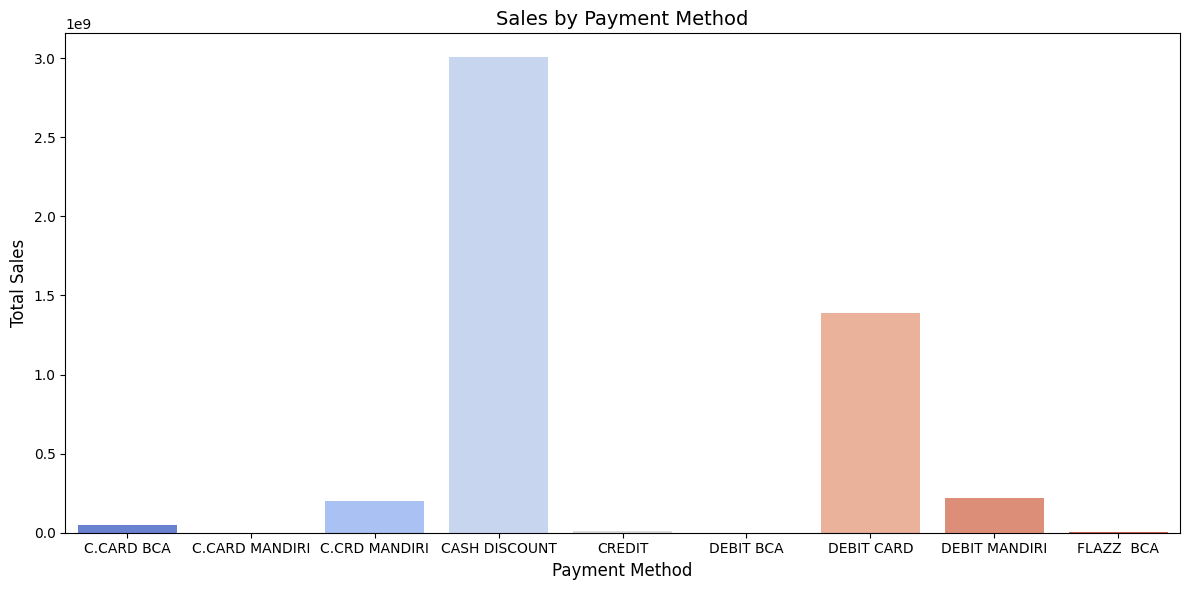

In [36]:
from matplotlib import pyplot as plt
import seaborn as sns

payment_sales = df.groupby('KET_TRANS')['JLH_TRANS'].sum()

plt.figure(figsize=(12, 6))
sns.barplot(x=payment_sales.index, y=payment_sales.values, palette='coolwarm')
plt.title('Sales by Payment Method', fontsize=14)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.tight_layout()
plt.show()

Dari visualisasi di atas, dapat kita lihat bahwa sebagian besar pelanggan memilih menggunakan uang tunai sebagai metode pembayaran. Kemudian diikuti oleh kartu debit, dan terakhir kartu kredit.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


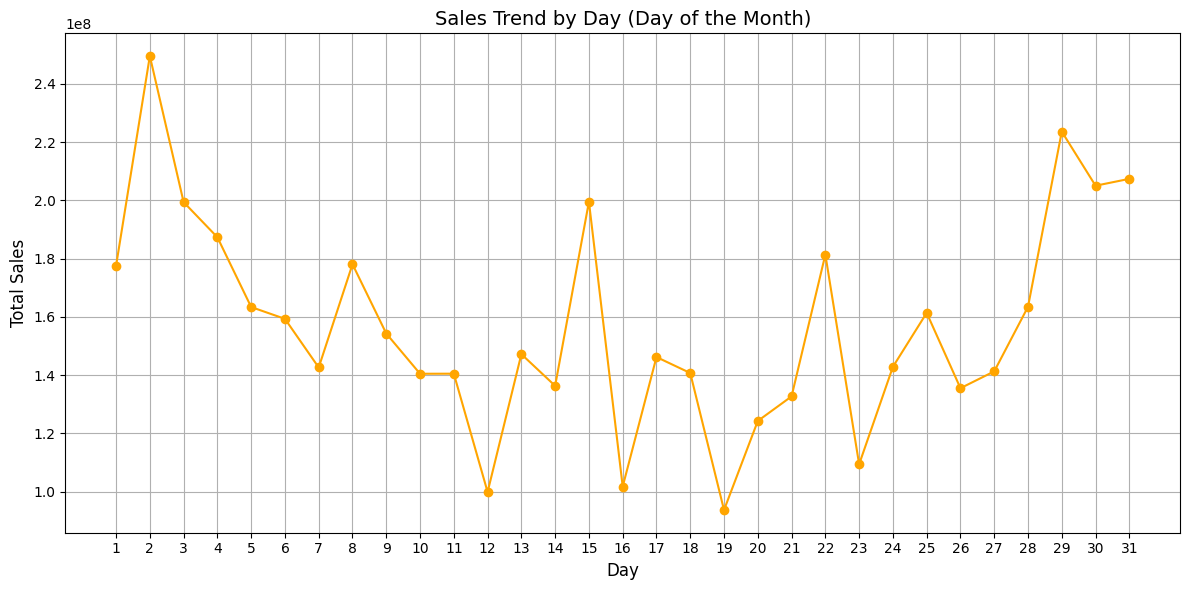

In [37]:
df['TGL_TRANS'] = pd.to_datetime(df['TGL_TRANS'])

df['Day'] = df['TGL_TRANS'].dt.day

daily_sales = df.groupby('Day')['JLH_TRANS'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Day'], daily_sales['JLH_TRANS'], marker='o', color='orange', linestyle='-')
plt.title('Sales Trend by Day (Day of the Month)', fontsize=14)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(True)
plt.xticks(range(1, 32))
plt.tight_layout()
plt.show()

Kode tersebut menyoroti tren kinerja penjualan berdasarkan setiap tanggal dalam 12 bulan. Penjualan tertinggi biasanya terjadi pada awal bulan (tanggal 2), pertengahan bulan (tanggal 14), dan akhir bulan (tanggal 31).

In [38]:
df['TGL_TRANS'] = pd.to_datetime(df['TGL_TRANS'], errors='coerce')

df['Days'] = df['TGL_TRANS'].dt.day_name()

daily_transactions_count = df.groupby('Days').size().reset_index(name='Transaction_Count')

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_transactions_count['Days'] = pd.Categorical(daily_transactions_count['Days'], categories=day_order, ordered=True)

daily_transactions_count = daily_transactions_count.sort_values('Days')

print(daily_transactions_count)

        Days  Transaction_Count
1     Monday              22487
5    Tuesday              23828
6  Wednesday              16643
4   Thursday              14323
0     Friday              15932
2   Saturday              15813
3     Sunday              26911


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-39-69c203029a1d>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='Days', y='Transaction_Count', data=daily_transactions_count, marker='o', palette='viridis')


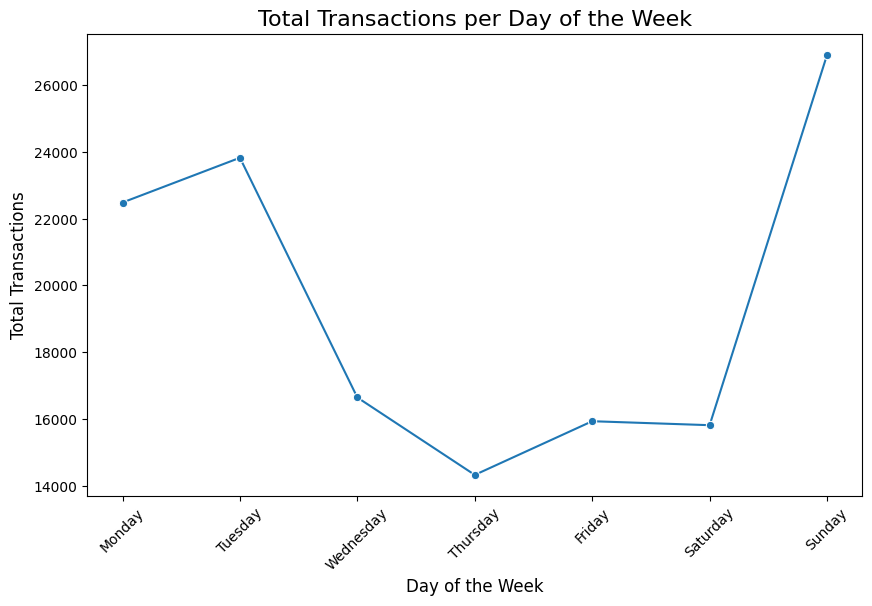

In [39]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Days', y='Transaction_Count', data=daily_transactions_count, marker='o', palette='viridis')

plt.title('Total Transactions per Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Transactions', fontsize=12)
plt.xticks(rotation=45)

plt.show()

Dari visualisasi di atas, dapat kita lihat bahwa penjualan tertinggi di supermarket terjadi pada hari Selasa dan Minggu. Penjualan menurun drastis dari hari Selasa ke Rabu dan terus menurun hingga Kamis. Namun, terlihat sedikit peningkatan pada hari Jumat.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


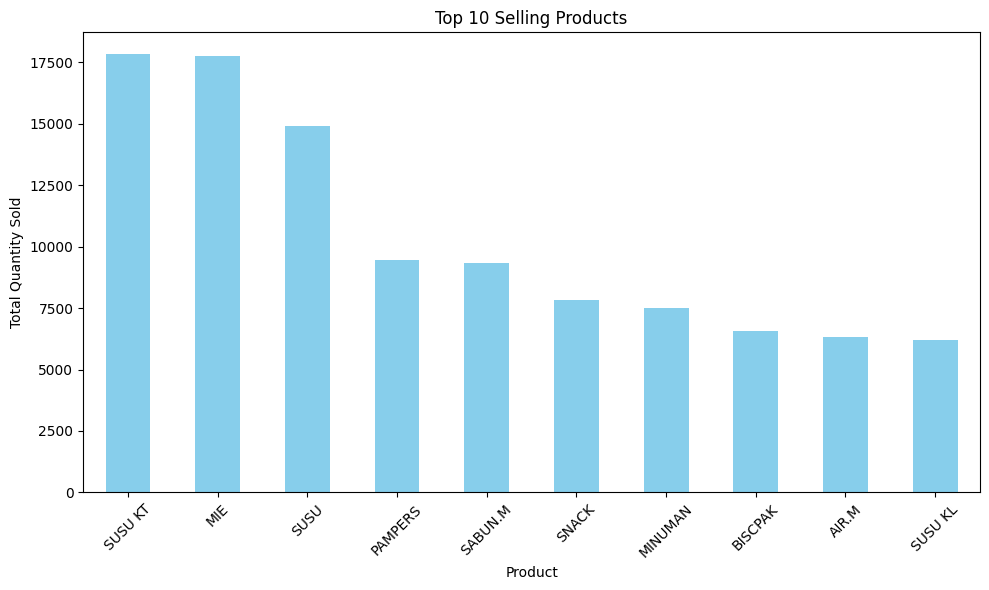

In [40]:
top_products = df.groupby('KEL')['QTY'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Selling Products')
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Visualisasi tersebut membantu melihat kategori barang paling populer di supermarket. Mie menjadi kategori paling populer, diikuti oleh susu KT, susu, dan seterusnya.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-41-be6b52d78d51>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  item_counts_by_period = df.groupby(['period_day', 'KEL']).size().reset_index(name='count')
<ipython-input-41-be6b52d78d51>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_item

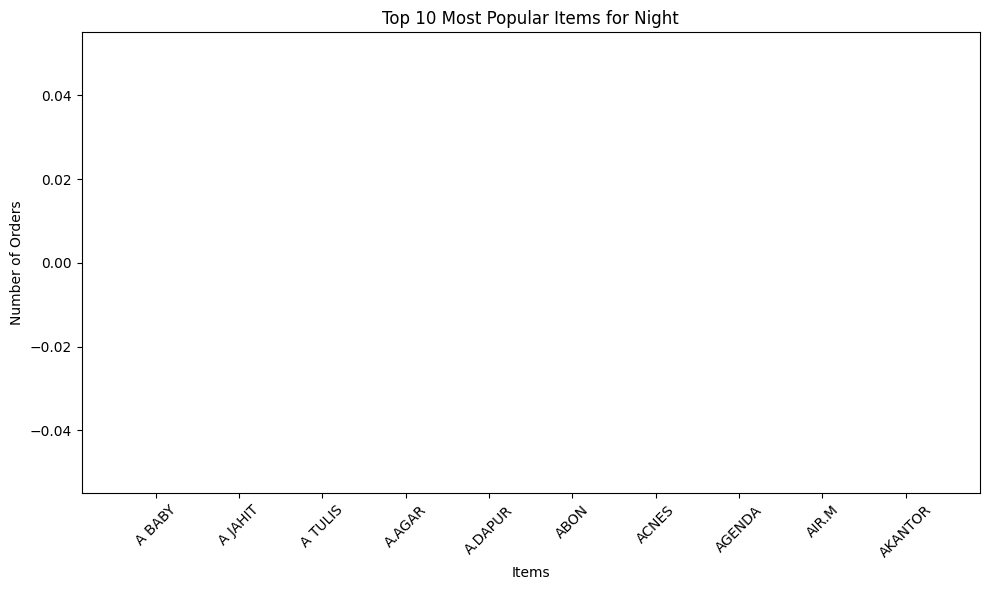

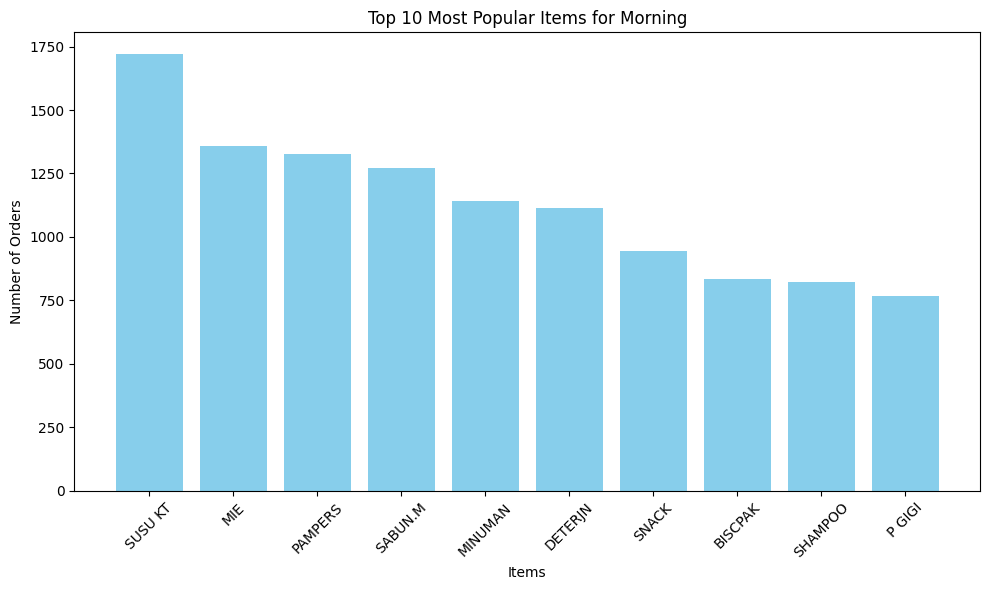

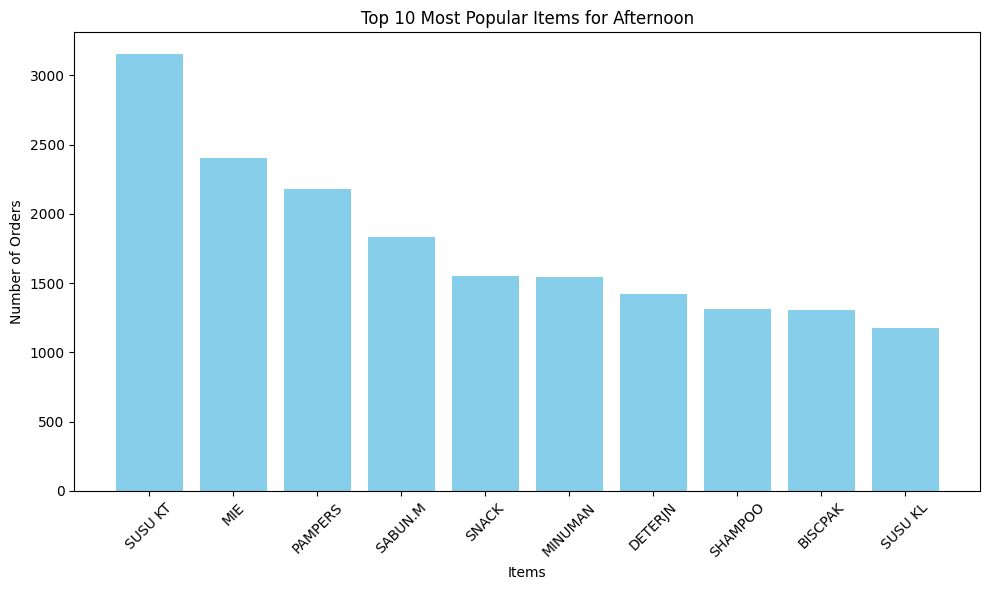

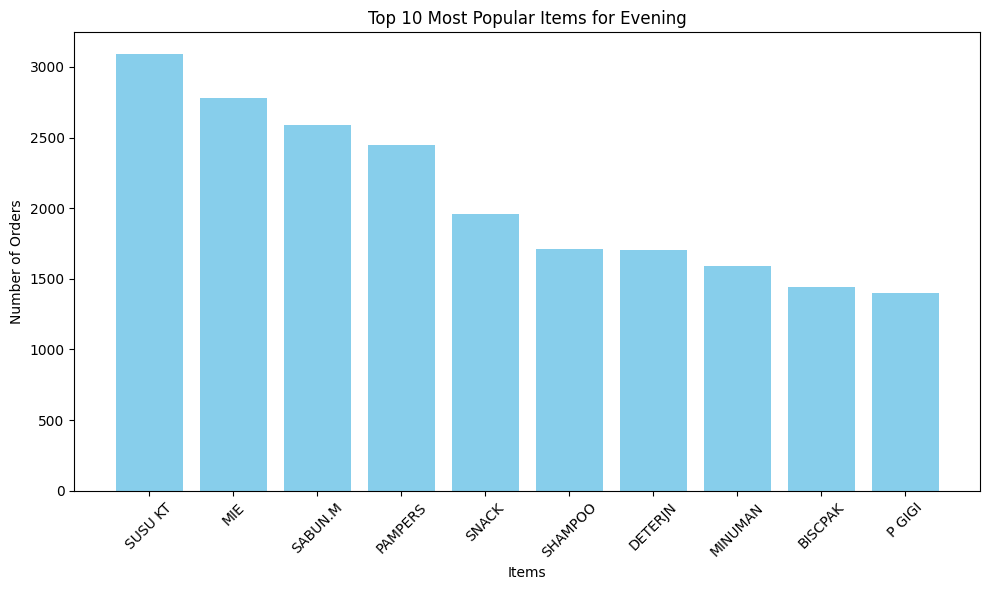

In [41]:
df['hour'] = pd.to_datetime(df['JAM'], format='%H:%M:%S', errors='coerce').dt.hour
bins = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
df['period_day'] = pd.cut(df['hour'], bins=bins, labels=labels, right=False)

item_counts_by_period = df.groupby(['period_day', 'KEL']).size().reset_index(name='count')

top_items_by_period = item_counts_by_period.groupby('period_day').apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)

periods = top_items_by_period['period_day'].unique()
for period in periods:
    data = top_items_by_period[top_items_by_period['period_day'] == period]

    plt.figure(figsize=(10, 6))
    plt.bar(data['KEL'], data['count'], color='skyblue')
    plt.xlabel('Items')
    plt.ylabel('Number of Orders')
    plt.title(f'Top 10 Most Popular Items for {period}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Ini menyoroti distribusi barang yang terjual di supermarket pada berbagai waktu dalam sehari. "Susu KT" secara konsisten menjadi barang terlaris sepanjang hari. Menariknya, lima barang teratas di pagi dan malam hari tetap sama, meskipun urutannya sedikit berbeda di pagi hari. Grafik untuk waktu malam kosong, kemungkinan karena supermarket tutup pada waktu tersebut.

In [47]:
apriori_data = pd.crosstab(pd.read_excel(url, engine='openpyxl')['NO_BKT'], df['KEL'])
apriori_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KEL,A BABY,A JAHIT,A TULIS,A.AGAR,A.DAPUR,ABON,ACNES,AGENDA,AIR.M,AKANTOR,...,VAPE,VIVA,WAFER,WAFER.P,WAFERKL,WALLS,WARDAH,WONDERL,WRP LW,ZWITSAL
NO_BKT,,,,,,,,,,,,,,,,,,,,,
010101001,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
010101002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
010101003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
010101004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
010101005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0


In [48]:
basket_encoded = apriori_data.applymap(lambda x: 1 if x > 0 else 0)
basket_encoded.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-48-18aaf985f75e>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encoded = apriori_data.applymap(lambda x: 1 if x > 0 else 0)


KEL,A BABY,A JAHIT,A TULIS,A.AGAR,A.DAPUR,ABON,ACNES,AGENDA,AIR.M,AKANTOR,...,VAPE,VIVA,WAFER,WAFER.P,WAFERKL,WALLS,WARDAH,WONDERL,WRP LW,ZWITSAL
NO_BKT,,,,,,,,,,,,,,,,,,,,,
010101001,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
010101002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
010101003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
010101004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
010101005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [49]:
frequent_itemsets = apriori(basket_encoded, min_support=0.02, use_colnames=True)
output = frequent_itemsets[['support', 'itemsets']]
print("Frequent Itemsets:")
output

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent Itemsets:


,support,itemsets
0,0.038587,(AIR.M)
1,0.032868,(ASESORS)
2,0.033576,(B DAPUR)
3,0.063953,(BISCPAK)
4,0.024262,(BTL/DOT)
5,0.032727,(COKLAT)
6,0.027008,(DDORANT)
7,0.085327,(DETERJN)
8,0.029075,(GULA)
9,0.021204,(HBL)


In [50]:
frequent_itemsets = apriori(basket_encoded, min_support=0.02, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

display(rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(SNACK),(BISCPAK),0.068794,0.063953,0.022025,0.320165,5.006275,0.017626,1.376874,0.859370
1,(BISCPAK),(SNACK),0.063953,0.068794,0.022025,0.344400,5.006275,0.017626,1.420388,0.854925
2,(DETERJN),(MIE),0.085327,0.080373,0.023922,0.280358,3.488234,0.017064,1.277896,0.779865
3,(MIE),(DETERJN),0.080373,0.085327,0.023922,0.297640,3.488234,0.017064,1.302285,0.775664
4,(DETERJN),(SOFTENR),0.085327,0.043711,0.028254,0.331121,7.575261,0.024524,1.429690,0.948963
5,(SOFTENR),(DETERJN),0.043711,0.085327,0.028254,0.646373,7.575261,0.024524,2.586548,0.907666
6,(SUSU KT),(DETERJN),0.170172,0.085327,0.024630,0.144735,1.696238,0.010110,1.069461,0.494633
7,(DETERJN),(SUSU KT),0.085327,0.170172,0.024630,0.288653,1.696238,0.010110,1.166558,0.448751
8,(PAMPERS),(P GIGI),0.142287,0.077626,0.021148,0.148627,1.914645,0.010102,1.083395,0.556958
9,(P GIGI),(PAMPERS),0.077626,0.142287,0.021148,0.272429,1.914645,0.010102,1.178872,0.517914


### **Wawasan Utama dan Tren**

1. **Kategori Terlaris**:  
   - **Mie, Susu KT, Susu, dan Minuman**: Kategori ini menyumbang porsi penjualan yang signifikan, sehingga perlu ditempatkan secara strategis di toko.  
   - **Susu KT**: Menjadi barang populer sepanjang hari, mencerminkan permintaan yang tinggi dari pelanggan.  

2. **Preferensi Pelanggan**:  
   - **Metode Pembayaran**: Uang tunai tetap menjadi metode pembayaran utama, diikuti oleh kartu debit. Pastikan manajemen uang tunai yang efisien dan berikan opsi pembayaran alternatif yang jelas.  
   - **Periode Penjualan Puncak**: Penjualan mencapai puncaknya pada awal (tanggal 2), tengah (tanggal 14), dan akhir bulan (tanggal 31), menunjukkan perilaku pembelian yang terkait dengan hari gajian atau rutinitas bulanan.  
   - **Hari Penjualan Tertinggi**: Selasa dan Minggu memiliki aktivitas penjualan tertinggi, sehingga memerlukan pengelolaan staf dan inventaris yang optimal.  

3. **Permintaan Berdasarkan Waktu**:  
   - **Susu KT**: Pastikan stok cukup dan produk terlihat dengan baik sepanjang hari karena permintaannya stabil.  
   - **Pagi dan Malam**: Sesuaikan promosi atau penempatan barang untuk memenuhi kebutuhan pelanggan pada waktu tersebut (misalnya, item sarapan di pagi hari).  

4. **Aturan Asosiasi (Peluang Cross-Selling)**:  
   - Meski kombinasi produk spesifik memerlukan analisis lebih lanjut menggunakan *association rule mining*, pendekatan umum mencakup menempatkan barang pelengkap bersama-sama (misalnya, Mie dengan Saus, Susu KT dengan Roti, dan Minuman dengan Camilan).  

---

### **Saran yang Dapat Dilaksanakan**

1. **Penempatan Produk yang Strategis**:  
   - **Lokasi Utama**: Tempatkan kategori terlaris dan Susu KT di area dengan lalu lintas tinggi seperti pintu masuk, kasir, dan ujung rak.  
   - **Pasangan Pelengkap**: Gunakan wawasan aturan asosiasi untuk menempatkan barang yang sering dibeli bersama di dekat satu sama lain guna mendorong *cross-selling*.  
   - **Display Musiman**: Soroti produk musiman atau promosi selama periode penjualan puncak (misalnya, tema kembali ke sekolah atau liburan).  

2. **Optimisasi Kasir**:  
   - **Manajemen Uang Tunai yang Lancar**: Latih staf dan pastikan sistem kasir efisien untuk transaksi tunai yang cepat.  
   - **Opsi Pembayaran**: Pastikan opsi pembayaran dengan kartu debit dan kredit mudah diakses dan terlihat jelas.  

3. **Promosi Berdasarkan Waktu**:  
   - **Susu KT**: Manfaatkan popularitasnya dengan menjalankan promosi berkelanjutan.  
   - **Penawaran Pagi dan Malam**: Buat penawaran yang ditargetkan sesuai preferensi pelanggan, seperti kopi dan spesial sarapan di pagi hari.  

4. **Penjadwalan Staf**:  
   - **Hari Puncak**: Jadwalkan staf yang cukup pada hari Selasa dan Minggu untuk menangani volume pelanggan yang tinggi.  
   - **Jam Fleksibel**: Sesuaikan jumlah staf secara dinamis berdasarkan alur pelanggan secara real-time untuk memastikan efisiensi dan kepuasan pelanggan.  

5. **Keputusan Berdasarkan Data**:  
   - **Pemantauan Berkelanjutan**: Analisis data penjualan, perilaku pelanggan, dan inventaris secara teratur untuk beradaptasi dengan tren yang muncul.  
   - **Eksperimen**: Uji berbagai tata letak toko, promosi, dan strategi harga untuk menentukan pendekatan yang paling efektif.  
   - **Wawasan Aturan Asosiasi**: Gunakan analisis aturan asosiasi untuk mengidentifikasi pasangan produk spesifik dan meningkatkan strategi penempatan.  

---

### **Langkah Selanjutnya**  

1. **Implementasi Association Rule Mining**:  
   Lakukan analisis aturan asosiasi untuk menentukan kombinasi produk spesifik yang sering dibeli bersama.  

2. **Optimisasi Tata Letak**:  
   Atur ulang bagian toko untuk menyesuaikan dengan pasangan produk yang telah diidentifikasi dan meningkatkan kenyamanan pelanggan.  

3. **Pemantauan dan Evaluasi**:  
   Pantau kinerja penjualan, umpan balik pelanggan, dan metrik utama untuk menilai efektivitas perubahan yang diterapkan dan menyempurnakan strategi sesuai kebutuhan.  

---

### **Contoh Fokus Bulan Januari**  
- **Promosi Kembali ke Sekolah**: Buat bagian khusus untuk kebutuhan sekolah seperti alat tulis, camilan, dan minuman.  
- **Inisiatif Awal yang Sehat**: Promosikan produk kesehatan seperti hasil segar, yogurt, dan Susu KT untuk mendukung resolusi Tahun Baru.  
- **Penyesuaian Tata Letak**: Gunakan temuan aturan asosiasi untuk menempatkan produk pelengkap secara strategis.  
- **Pemantauan Kinerja**: Lacak penjualan barang promosi dan kombinasi *cross-selling* untuk mengukur keberhasilan inisiatif ini.  